# Perceptrón Multicapa

---



In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa (28 por 28 pixeles)


Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


[link text](https://)Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* el modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>remera</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pantalón</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Campera</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Zapatilla</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolso</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Bota</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [3]:
class_names = ['Remera', 'Pantalón', 'Pullover', 'Vestido', 'Campera',
               'Sandalia', 'Remera', 'Zapatilla', 'Bolso', 'Bota']

## Exploremos el set de datos


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

Cada etiqueta es un integro entre 0 y 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas.

In [7]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [8]:
len(test_labels)

10000

## Pre-procesamiento de los datos

El set de datos debe ser pre-procesada antes de entrenar la red. Veamos primera imagen en el set de entrenamiento. Podemos ver que  los valores de los pixeles van de 0 a 255:

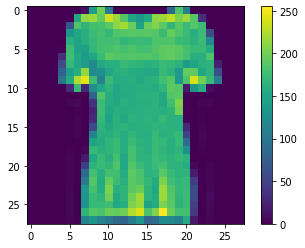

In [13]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

Vamos a normalizar estos valores en un rango antes de correr el modelo de la red neuronal. Para hacero, dividimos los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma.

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes deel *training set* y mostraremos el nombre de cada clase debajo de cada imagen.

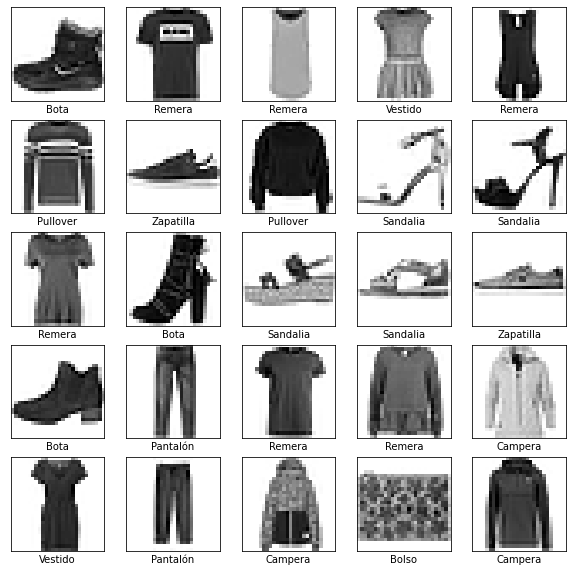

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas


In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
#keras genera objeto de secuencia que le genera capas unas a otras. Armo la estructura de grafo, transpormo lo de 28 x 28 n
#un vector. Pongo cada una de las filas despues de la otra. 

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (matriz de 28 por 28 pixeles) a un arreglo uni dimensional (vector de 28*28 pixeles = 784 pixeles). 

Despues de que los pixeles estan "aplanados",la primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. 

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo va aprendiendo basado en el set de datos que ve y la funcion de perdida, o sea la configuración del proceso de BackPropagation para ir actualizando paso a paso los valores de los pesos y de los bias
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa exactitud (*accuracy*)

Para más detalles ver: https://keras.io/api/losses/ , https://keras.io/optimizers , https:// keras.io/metrics.

In [53]:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento (fit) del Modelo

Para más info: https://keras.io/api/models/model_training_apis/

In [55]:
model.fit(train_images, train_labels, epochs=60, batch_size=128)

Epoch 1/60
469/469 [==============================] - 3s 6ms/step - loss: 0.7264 - accuracy: 0.7246
Epoch 2/60
469/469 [==============================] - 3s 6ms/step - loss: 0.6752 - accuracy: 0.7391
Epoch 3/60
469/469 [==============================] - 3s 6ms/step - loss: 0.6447 - accuracy: 0.7484
Epoch 4/60
469/469 [==============================] - 3s 6ms/step - loss: 0.6182 - accuracy: 0.7596
Epoch 5/60
469/469 [==============================] - 3s 6ms/step - loss: 0.5967 - accuracy: 0.7872
Epoch 6/60
469/469 [==============================] - 3s 6ms/step - loss: 0.5659 - accuracy: 0.8351
Epoch 7/60
469/469 [==============================] - 3s 6ms/step - loss: 0.5113 - accuracy: 0.8555
Epoch 8/60
469/469 [==============================] - 3s 6ms/step - loss: 0.4739 - accuracy: 0.8631
Epoch 9/60
469/469 [==============================] - 3s 6ms/step - loss: 0.4504 - accuracy: 0.8680
Epoch 10/60
469/469 [==============================] - 3s 6ms/step - loss: 0.4356 - accuracy: 0.8716

## ACTIVIDAD

Previo a evaluar la exactitud del modelo vamos a realizar una actividad para poder entender como poder modificar los modelos.

1 - Volver a correr el entrenamiento de la red y verificar como se comporta el accuracy

2 - Cambiar el optimizador probar con adam y RMSprop

3 - Probar agregar mas capas densas (con 64, 32 y 10 neuronas por capa agregada)

4 - Cambiar el hiperparametro de Epocas y verificar como influye


## Evaluar Exactitud

Siguente, compare como el rendimiento del modelo sobre el set de testing:

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4079 - accuracy: 0.8857 - 937ms/epoch - 3ms/step

Test accuracy: 0.885699987411499


## Hacer predicciones

Con el modelo entrenado  podemos hacer predicciones sobre imagenes.

In [39]:
X_new = test_images[:3]
y_proba = model.predict(X_new)
y_proba.round(4)

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-04,
        0.000e+00, 1.100e-03, 0.000e+00, 9.988e-01],
       [6.000e-04, 0.000e+00, 9.972e-01, 0.000e+00, 8.000e-04, 0.000e+00,
        1.400e-03, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]], dtype=float32)

In [35]:
y_pred = [np.argmax(prob) for prob in y_proba]
y_pred

[9, 2, 1]

In [36]:
np.array(class_names)[y_pred]

array(['Bota', 'Pullover', 'Pantalón'], dtype='<U9')

Vamos a armar un vector con todas las predicciones en el test set

In [29]:
predictions = model.predict(test_images)

**Graficar**  las predicciones de las 10 clases.

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [1], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega la probabilidad (sen porcentaje) para para la etiqueta predicha.

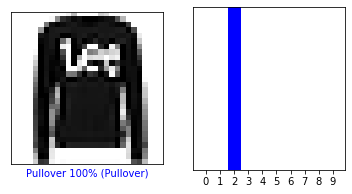

In [31]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

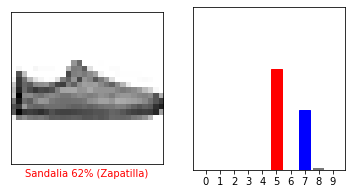

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando la probabilidad sea alta.

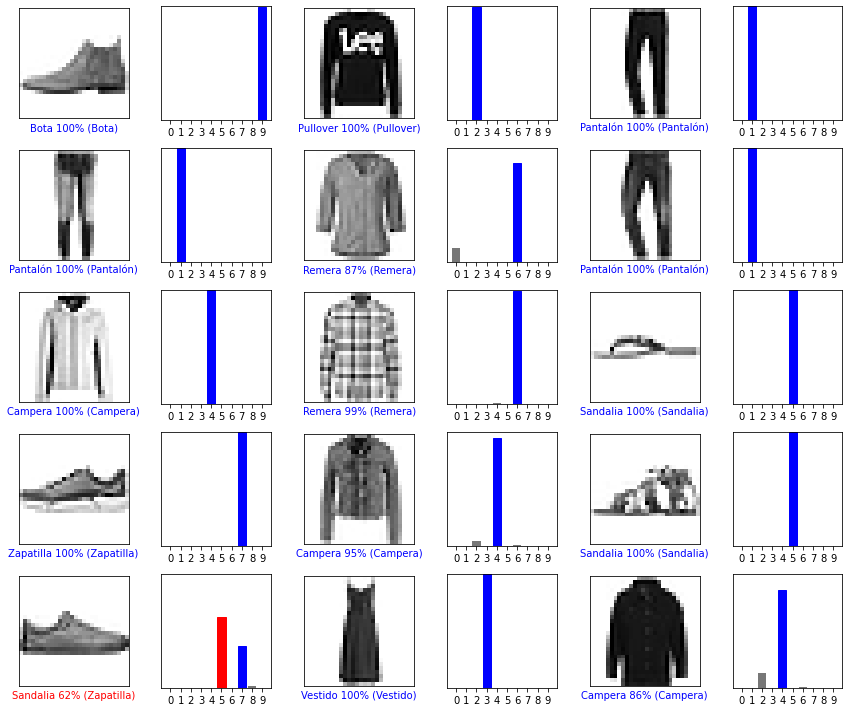

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, [np.argmax(pred) for pred in model.predict(test_images)])
matrix

array([[847,   4,  12,  19,   5,   1, 106,   0,   6,   0],
       [  2, 980,   2,  11,   2,   0,   3,   0,   0,   0],
       [ 19,   0, 809,  19,  89,   0,  64,   0,   0,   0],
       [ 25,  11,   7, 907,  27,   0,  21,   0,   2,   0],
       [  1,   1,  95,  32, 815,   0,  54,   0,   2,   0],
       [  1,   0,   0,   1,   0, 948,   0,  26,   3,  21],
       [139,   2,  79,  34,  66,   0, 669,   0,  11,   0],
       [  0,   0,   0,   0,   0,   9,   0, 971,   0,  20],
       [  9,   0,   4,   1,   6,   4,   7,   5, 964,   0],
       [  0,   0,   0,   0,   0,   6,   1,  37,   0, 956]])

In [50]:
acc = np.sum(np.diagonal(matrix))/np.sum(matrix)
acc

0.8866